In [ ]:
''' You have been provided with data from the Titanic Passenger Roaster,
depicting if an individual survived the sinking of the ship or not.
‘Survived’ is denoted by (1) and ‘Did Not Survive’ is denoted by (0). 
Only using Plotly, graph the following information from the data. 
Feel free to use any of the Plotly submodules discussed (graph_objects,plotly express or iplot)##. Remember to label your axis and name your plots appropriately. 
For each given question, only one figure is expected. 

In [ ]:
# 1.	Show the age distribution in the data using a histogram.

In [3]:
import pandas as pd
df=pd.read_csv('D:/python/Week 4/Titanic Data.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


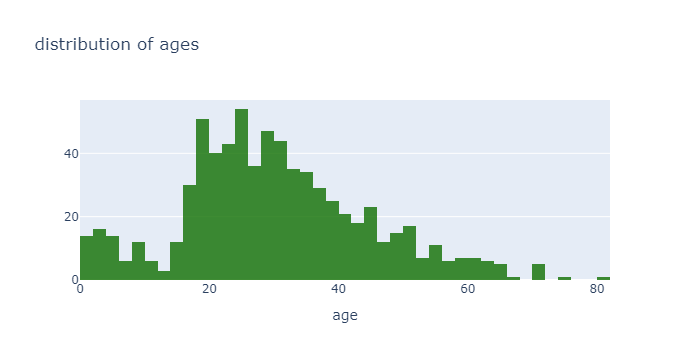

In [12]:
import pandas as pd
import plotly.graph_objects as go
df=pd.read_csv('D:/python/Week 4/Titanic Data.csv')
trace1 = go.Histogram(
                    x = df.Age,  
                    name = "distribution of ages",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
data = [trace1]
layout = go.Layout(title=' distribution of ages ',
                   xaxis=dict(title='age'),
)
fig = go.Figure(data=data, layout=layout)

fig.show()


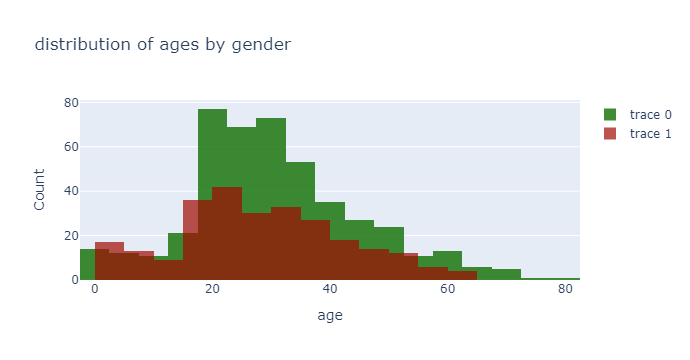

In [18]:
#2.	Show the age distribution based on gender using a histogram.
import pandas as pd
import plotly.graph_objects as go
df=pd.read_csv('D:/python/Week 4/Titanic Data.csv')
grouped = df.groupby('Sex')
trace1 = go.Histogram(
                    x =grouped.get_group('male')['Age'],  
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
trace2 = go.Histogram(
                    x = grouped.get_group('female')['Age'],  
                    marker = dict(color = 'rgba(162, 12, 2, 0.7)'))
data = [trace1,trace2]
layout = go.Layout(title=' distribution of ages by gender ',
                   xaxis=dict(title='age'),
                   yaxis=dict(title='Count'),
                   barmode='overlay'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

In [20]:
#3.	Using the function df.corr() to identify the correlation within the data, represent its results using a form of a matrix plot.
import pandas as pd
df=pd.read_csv('D:/python/Week 4/Titanic Data.csv')
columns_to_drop = ['Name','Sex','Ticket','Cabin','Embarked']
df_dropped = df.drop(columns=columns_to_drop)
corr_matrix = df_dropped.corr()
print(corr_matrix)



             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


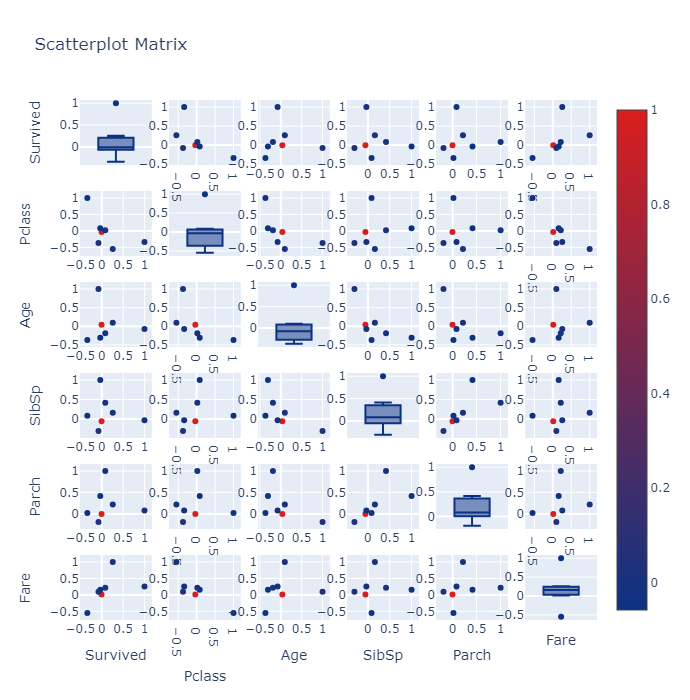

In [23]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(corr_matrix, diag='box', index='PassengerId',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)

fig = go.Figure(fig)

fig.show()

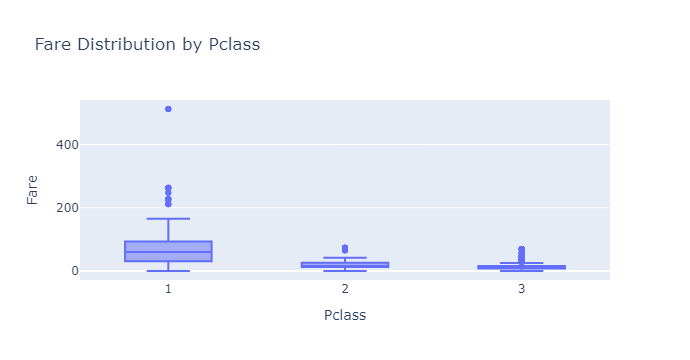

In [24]:
#4.	Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pivot_df = df.pivot(columns='Pclass', values='Fare')
melted_df = pivot_df.melt(var_name='Pclass', value_name='Fare')
fig = px.box(melted_df, x='Pclass', y='Fare', title='Fare Distribution by Pclass')
fig.show()


In [ ]:
#5 Graph the value counts of the number of passengers who survived and did not survive based on gender using a stacked bar graph.
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('D:/python/Week 4/Titanic Data.csv')

# Count the number of survivors and non-survivors by gender
survivor_counts_by_gender = df.groupby(['Sex', 'Survived']).size().unstack()

# Display the count of survivors and non-survivors by gender
print("Count of survivors and non-survivors by gender:")
print(survivor_counts_by_gender)

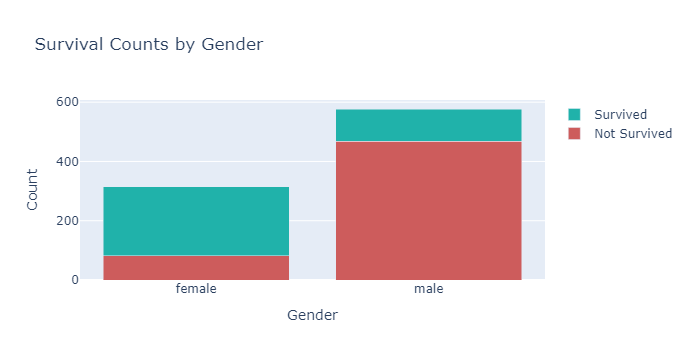

In [44]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Not Survived', x=survivor_counts_by_gender.index, y=survivor_counts_by_gender[0], marker_color='indianred'),
    go.Bar(name='Survived', x=survivor_counts_by_gender.index, y=survivor_counts_by_gender[1], marker_color='lightseagreen')
])

# Update the layout
fig.update_layout(
    title='Survival Counts by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

# Show the figure
fig.show()

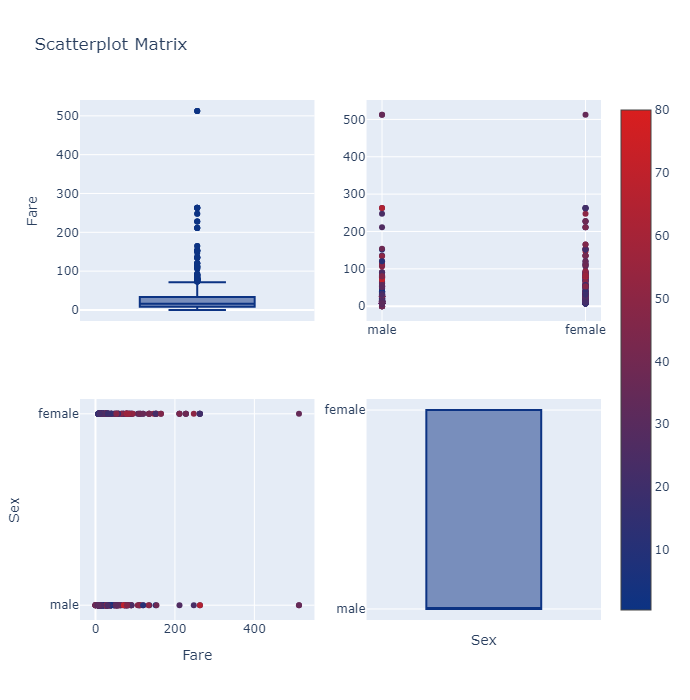

In [39]:
# 6.Using a scatter plot, plot the ages to the fare paid by the each passenger based on their gender.
import plotly.figure_factory as ff
df=df.loc[:,['Age','Fare','Sex']]
fig = ff.create_scatterplotmatrix(df, diag='box', index='Age',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)

fig = go.Figure(fig)

fig.show()

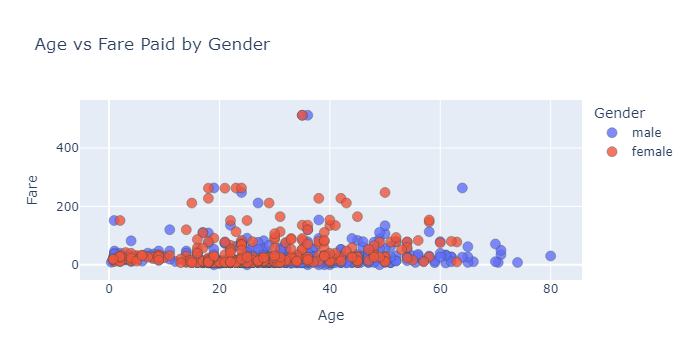

In [36]:
#7.	Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name
# Importing necessary libraries
import pandas as pd
import plotly.graph_objects as go


# Drop rows with missing Age or Fare values
df = df.dropna(subset=['Age', 'Fare'])

# Create scatter plot using Plotly
fig = go.Figure()

# Add traces for each gender
for gender in df['Sex'].unique():
    data = df[df['Sex'] == gender]
    fig.add_trace(go.Scatter(
        x=data['Age'],
        y=data['Fare'],
        mode='markers',
        name=gender,
        marker=dict(
            size=10,
            opacity=0.8,
            line=dict(width=0.5, color='DarkSlateGrey')
        )
    ))

# Update layout for better visualization
fig.update_layout(
    title='Age vs Fare Paid by Gender',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Fare'),
    legend=dict(title='Gender')
)

# Show the plot
fig.show()
